<a href="https://colab.research.google.com/github/BillyMuthiani/DATA-SCIENCE-REPOSITORY/blob/main/Titanic_Survival_Dataset__Decision_Trees_Vs_Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚢 Titanic Survival Prediction: Decision Trees and Random Forests


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


In [ ]:
# Load the head of the dataset
df = pd.read_csv('/content/Cleaned Titanic data.xlsx - Sheet1.csv')
df.head()

,PassengerId,Passenger class,Title,Other names,Surname,Gender,Age,Family size,Ticket,Fare,Cabin,Embarked,Survival
0,1,3rd class,Mr,Owen Harris,Braund,male,22.0,2,A/5 21171,7.2500,NaN,Southampton,Died
1,2,1st class,Mrs,John Bradley (Florence Briggs Thayer),Cumings,female,38.0,2,PC 17599,71.2833,C85,Cherbourg,Survived
2,3,3rd class,Miss,Laina,Heikkinen,female,26.0,1,STON/O2. 3101282,7.9250,NaN,Southampton,Survived
3,4,1st class,Mrs,Jacques Heath (Lily May Peel),Futrelle,female,35.0,2,113803,53.1000,C123,Southampton,Survived
4,5,3rd class,Mr,William Henry,Allen,male,35.0,1,373450,8.0500,NaN,Southampton,Died


In [ ]:
df.tail()

,PassengerId,Passenger class,Title,Other names,Surname,Gender,Age,Family size,Ticket,Fare,Cabin,Embarked,Survival
886,887,2nd class,Rev,Juozas,Montvila,male,27.0,1,211536,13.00,NaN,Southampton,Died
887,888,1st class,Miss,Margaret Edith,Graham,female,19.0,1,112053,30.00,B42,Southampton,Survived
888,889,3rd class,Miss,"Catherine Helen ""Carrie""",Johnston,female,NaN,4,W./C. 6607,23.45,NaN,Southampton,Died
889,890,1st class,Mr,Karl Howell,Behr,male,26.0,1,111369,30.00,C148,Cherbourg,Survived
890,891,3rd class,Mr,Patrick,Dooley,male,32.0,1,370376,7.75,NaN,Queenstown,Died


In [ ]:
df.describe(include ='all')

,PassengerId,Passenger class,Title,Other names,Surname,Gender,Age,Family size,Ticket,Fare,Cabin,Embarked,Survival
count,891.000000,891,891,891,891,891,714.000000,891.000000,891,891.000000,204,889,891
unique,NaN,3,17,799,667,2,NaN,NaN,681,NaN,147,3,2
top,NaN,3rd class,Mr,John,Andersson,male,NaN,NaN,347082,NaN,G6,Southampton,Died
freq,NaN,491,517,9,9,577,NaN,NaN,7,NaN,4,644,549
mean,446.000000,NaN,NaN,NaN,NaN,NaN,29.699118,1.904602,NaN,32.204208,NaN,NaN,NaN
std,257.353842,NaN,NaN,NaN,NaN,NaN,14.526497,1.613459,NaN,49.693429,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.420000,1.000000,NaN,0.000000,NaN,NaN,NaN
25%,223.500000,NaN,NaN,NaN,NaN,NaN,20.125000,1.000000,NaN,7.910400,NaN,NaN,NaN
50%,446.000000,NaN,NaN,NaN,NaN,NaN,28.000000,1.000000,NaN,14.454200,NaN,NaN,NaN
75%,668.500000,NaN,NaN,NaN,NaN,NaN,38.000000,2.000000,NaN,31.000000,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Passenger class  891 non-null    object 
 2   Title            891 non-null    object 
 3   Other names      891 non-null    object 
 4   Surname          891 non-null    object 
 5   Gender           891 non-null    object 
 6   Age              714 non-null    float64
 7   Family size      891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  Survival         891 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 90.6+ KB


In [ ]:
# Drop the irrelevant columns
df.drop(['PassengerId', 'Other names', 'Title', 'Surname', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Passenger class,0
Gender,0
Age,177
Family size,0
Embarked,2
Survival,0


In [ ]:
# Fill missing age with the mode
df['Age'].fillna(df['Age'].mode()[0], inplace=True);
# Fill missing Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True);

<ipython-input-8-deb6172416c9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mode()[0], inplace=True);
<ipython-input-8-deb6172416c9>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [ ]:
# Converting Sex to numerical
df['Gender'] = df['Gender'].map({'male': 0, 'female': 1})

# Convert Passenger class to numerical
df['Passenger class'] = df['Passenger class'].map({'1st class': 1, '2nd class': 2, '3rd class': 3})

# Convert Survival and died to numerical
df['Survival'] = df['Survival'].map({'Survived': 1, 'Died': 0})

In [ ]:
# Check the current columns we have
print(df.columns)

Index(['Passenger class', 'Gender', 'Age', 'Family size', 'Embarked',
       'Survival'],
      dtype='object')


In [ ]:
# Onen hot encoded 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'])

In [ ]:
# Check the new updated dataframe with just the columns we need to build our model
print(df.head())

   Passenger class  Gender   Age  Family size  Survival  Embarked_Cherbourg  \
0                3       0  22.0            2         0               False   
1                1       1  38.0            2         1                True   
2                3       1  26.0            1         1               False   
3                1       1  35.0            2         1               False   
4                3       0  35.0            1         0               False   

   Embarked_Queenstown  Embarked_Southampton  
0                False                  True  
1                False                 False  
2                False                  True  
3                False                  True  
4                False                  True  


# Build a decision Tree Model

### Calculating the Gini impurity


In [ ]:
# Separate your features (X) from target (y)
X = df.drop('Survival', axis=1)
y = df['Survival']

# Drop 'Embarked' column
if 'Embarked' in X.columns:
  x = X.drop('Embarked', axis=1)

# Train a decsion tree
tree_class = DecisionTreeClassifier(criterion = 'gini')
tree_class.fit(X, y)

# Show the feature importance
feature_importance = pd.Series(tree_class.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False)


,0
Gender,0.365946
Age,0.307708
Family size,0.152662
Passenger class,0.135614
Embarked_Southampton,0.022863
Embarked_Cherbourg,0.009523
Embarked_Queenstown,0.005684


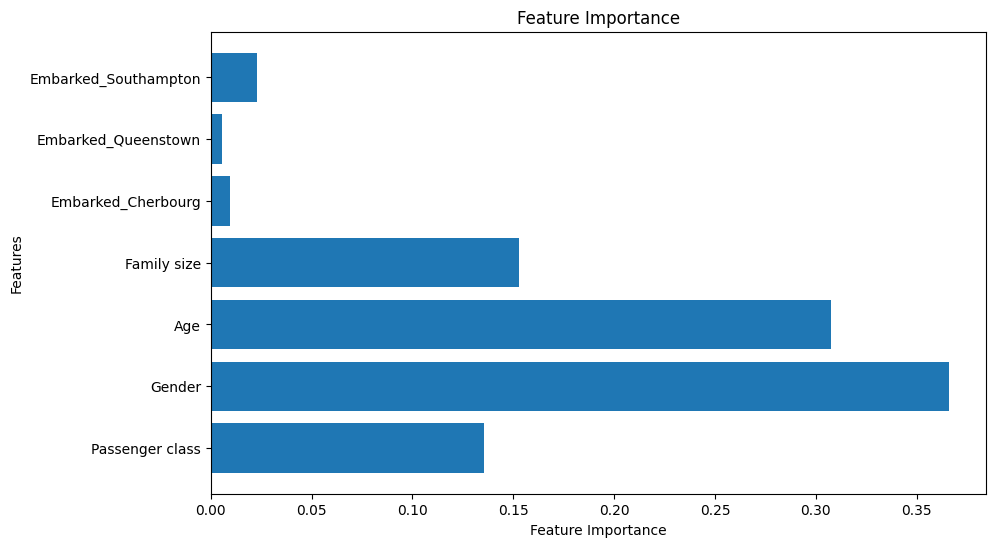

In [ ]:
# Plot a horizontal bar plot to show the feature importance

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance.values)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show;

# Train a decision Tree Model

In [ ]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decsion tree
tree_class = DecisionTreeClassifier(max_depth= 5, criterion = 'gini' , min_samples_split = 10, random_state=42)
tree_class.fit(X_train, y_train)

# Make predictions
y_pred_train = tree_class.predict(X_test)
acc_train = accuracy_score(y_test, y_pred_train)
print("Accuracy:", acc_train)

Accuracy: 0.8212290502793296


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred_train))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



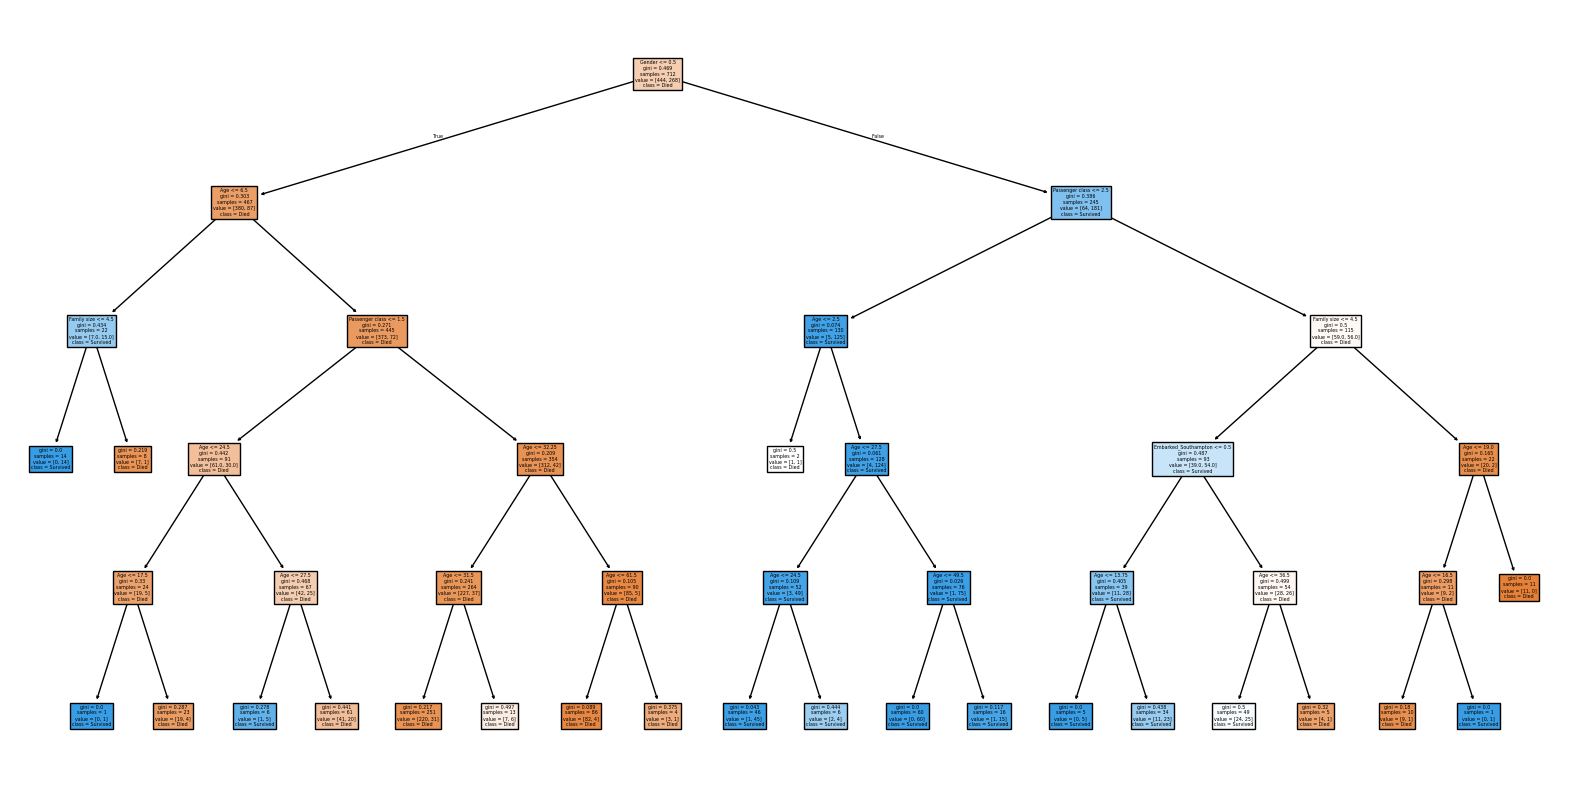

In [ ]:
# Plot a decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_class, filled=True, feature_names=X.columns, class_names=['Died', 'Survived'])
plt.show()


In [ ]:
# Cross validation with 5 folds
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_class, X, y, cv=5)
print(scores)
print(scores.mean())

[0.79329609 0.79775281 0.81460674 0.79213483 0.85393258]
0.810344611135522


# Train a random Forest Model

In [ ]:
# Train a random forest Model
rf= RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_random = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_random)
print("Accuracy:", rf_acc)

Accuracy: 0.8156424581005587


In [ ]:
# Print the classification report
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.84      0.69      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



In [ ]:
# Compare the accuracies
print("Decision Tree Accuracy:", acc_train)
print("Random Forest Accuracy:", rf_acc)


Decision Tree Accuracy: 0.8212290502793296
Random Forest Accuracy: 0.8156424581005587
